# Three-body problem

In this notebook, I implement a simple three-body simulation, which plots the movement of three orbiting bodies in 3D space.

In [1]:
# imports
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc


First, I define a class that records the velocity, current position, and mass of a body. The class also implements a single method that updates the current velocity and position of the body based on an acceleration vector:

In [2]:
class body:
    
    def __init__(self, 
                 position = [0.,0.,0.], 
                 velocity = [0.,0.,0.], 
                 mass = 1) -> None:
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.mass = mass
        
    def update(self, dv):
        self.velocity += 0.05*dv # 0.05 to smooth the simulation
        self.position += 0.05*self.velocity

Next, and given we will have three bodies, I define a function that calculates the system of acceleration vectors based on the current position and velocity of each body. The calculations below use the [Newtonian equations](https://arc.net/l/quote/dfvydfyi) of motion:

In [3]:
def accelerate(p1, p2, p3, g = 9.81) -> tuple[float]:
    a1 = -g*np.sum([p.mass*np.divide((p1.position - p.position),np.linalg.norm(p1.position - p.position)) for p in [p2, p3]],
                   axis = 0)
    a2 = -g*np.sum([p.mass*np.divide((p2.position - p.position),np.linalg.norm(p2.position - p.position)) for p in [p3, p1]],
                   axis = 0)
    a3 = -g*np.sum([p.mass*np.divide((p3.position - p.position),np.linalg.norm(p3.position - p.position)) for p in [p1, p2]],
                   axis = 0)
    
    return a1, a2, a3 

Finally, I instantiate three bodies setting (arbitrary) initial positions, zero velocities, and slightly different masses:

In [4]:
p1 = body([1.,0.,10.], [0.,0.,0.], 1.)
p2 = body([10.,-1.,0.], [0.,0.,0.],2.)
p3 = body([1.,10.,-10.], [0.,0.,0.],1.3)

## Dynamics

To simulate the movement of bodies, I use `matplotlib.animate` and define a function that a) calculates the current acceleration vectors, b) updates the respective positions and velocities of each body, then c) updates the plot with the new positions:

In [5]:
def update(frame):
    
    dv_1, dv_2, dv_3 = accelerate(p1,p2,p3)
    p1.update(dv_1)
    p2.update(dv_2)
    p3.update(dv_3)
    
    # update the scatter plot in x,y,z
    scat._offsets3d = ([p.position[0] for p in [p1,p2,p3]],
                       [p.position[1] for p in [p1,p2,p3]],
                       [p.position[2] for p in [p1,p2,p3]])
    
    return (scat)

Finally, with this setup complete, I setup the plot space and run the simulation:

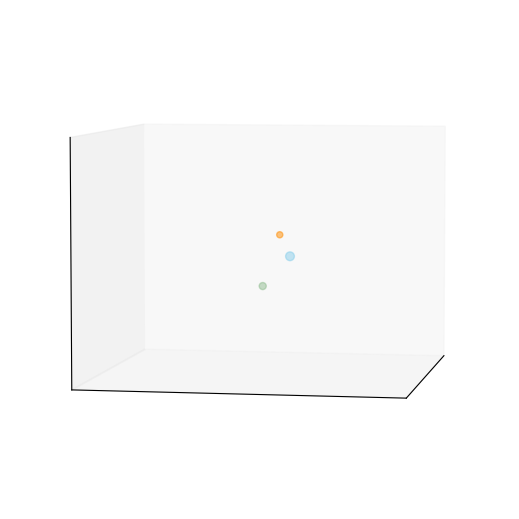

In [6]:
fig = plt.figure(frameon=False)
fig.set_size_inches(5,5)
ax = fig.add_subplot(projection='3d')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace = 0, wspace = 0)
scat = ax.scatter([p.position[0] for p in [p1,p2,p3]],
                  [p.position[1] for p in [p1,p2,p3]],
                  [p.position[2] for p in [p1,p2,p3]],
                  c = ['darkorange','skyblue','darkseagreen'], 
                  alpha = 0.5,
                  s = [p.mass*20 for p in [p1,p2,p3]])

# For better formatting:
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
zoom = 20
ax.set(xlim=[-zoom, zoom], ylim=[-zoom, zoom], zlim=[-zoom,zoom], xlabel='', ylabel='', zlabel='')
ax.view_init(elev=5, azim=10, roll=0)

# render
ani = animation.FuncAnimation(fig=fig, func=update, frames=600, interval=50)
rc('animation', html='html5')
ani